# Import Module and Preview Data 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Exploratory Data Analysis

Text(0.5, 1.0, 'Canceled Situation')

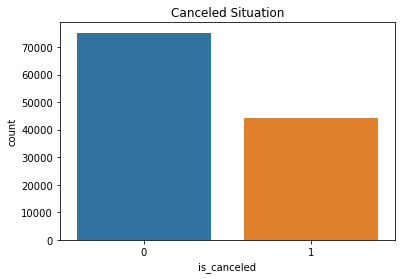

In [5]:
sns.countplot(df.is_canceled)
plt.title('Canceled Situation')

Text(0.5, 1.0, 'Hotel Types')

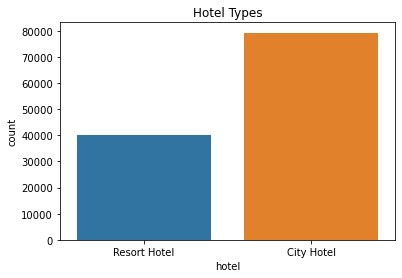

In [6]:
sns.countplot(df.hotel)
plt.title('Hotel Types')

Text(0.5, 1.0, 'Arrival Year vs Lead Time vs Canceled Situation')

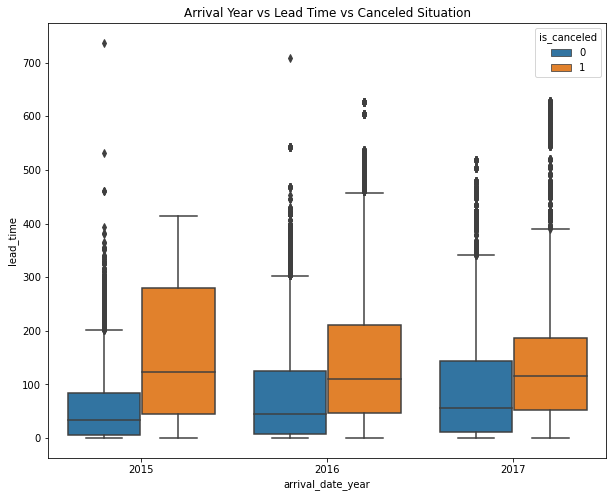

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df)
plt.title('Arrival Year vs Lead Time vs Canceled Situation')

In [8]:
df['arrival_date_month'].replace({'January' : 1, 
                                  'February' : 2, 
                                  'March' : 3, 
                                  'April' : 4, 
                                  'May' : 5, 
                                  'June' : 6, 
                                  'July' : 7, 
                                  'August' : 8, 
                                  'September' : 9, 
                                  'October' : 10, 
                                  'November' : 11, 
                                  'December' : 12}, inplace=True)

In [9]:
pd.crosstab(index=df['stays_in_week_nights'],
            columns=df['stays_in_weekend_nights'],
            margins=True, margins_name='Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


In [10]:
pd.options.mode.chained_assignment = None

def week_function(feature1, feature2, data):
    data['weekend_or_weekday'] = 0
    for i in range(0, len(data)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'
            
week_function(df['stays_in_weekend_nights'], df['stays_in_week_nights'], df)

Text(0, 0.5, 'Count')

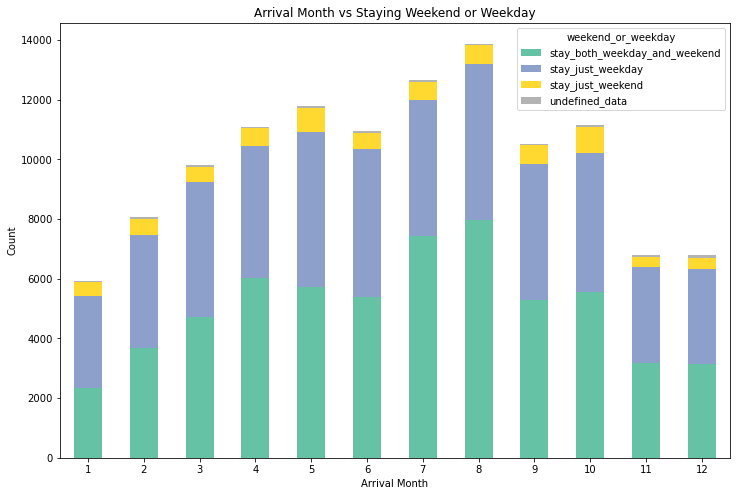

In [11]:
grouped_df = df.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack(fill_value=0)
grouped_df.plot(kind='bar', stacked=True, cmap='Set2', figsize=(12,8))
plt.title('Arrival Month vs Staying Weekend or Weekday')
plt.xlabel('Arrival Month')
plt.xticks(rotation=360)
plt.ylabel('Count')

Text(0.5, 1.0, 'Top 10 Country of Origin')

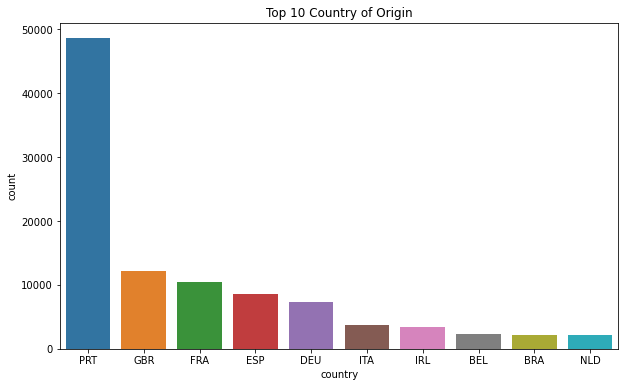

In [12]:
plt.figure(figsize=(10,6))

sns.countplot(x='country', data=df, order=df['country'].value_counts().iloc[:10].index)
plt.title('Top 10 Country of Origin')

Text(0.5, 1.0, 'Market Segment Types')

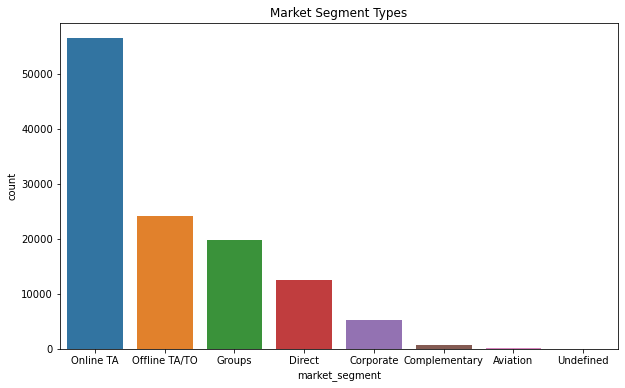

In [13]:
plt.figure(figsize=(10,6))

sns.countplot(x='market_segment', data=df, order=df['market_segment'].value_counts().iloc[:10].index)
plt.title('Market Segment Types')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

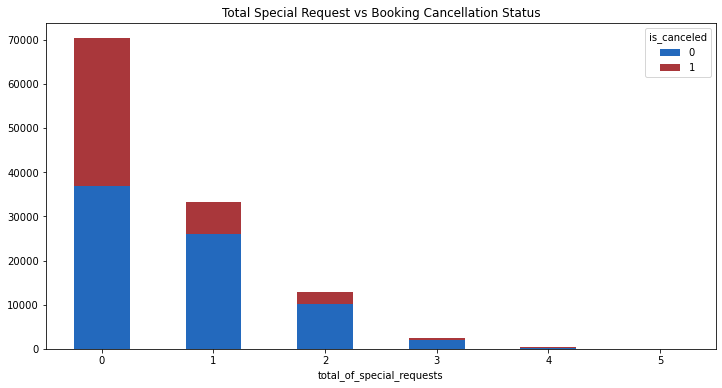

In [14]:
grouped_special_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)

grouped_special_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(12,6))
plt.title('Total Special Request vs Booking Cancellation Status')
plt.xticks(rotation=360)

In [15]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
df['children'] =  df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode().index[0]).astype(str)
df['agent']= df['agent'].fillna('0').astype(int)
df = df.drop(['company'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
df['all_children'] = df['children'] + df['babies']
df = df.drop(columns=['children', 'babies', 'reservation_status', 'reservation_status_date'])

In [19]:
from sklearn.preprocessing import LabelEncoder

category_columns = df.select_dtypes(include='object').columns

le = LabelEncoder()

for cols in category_columns:
    df[cols] = le.fit_transform(df[cols])

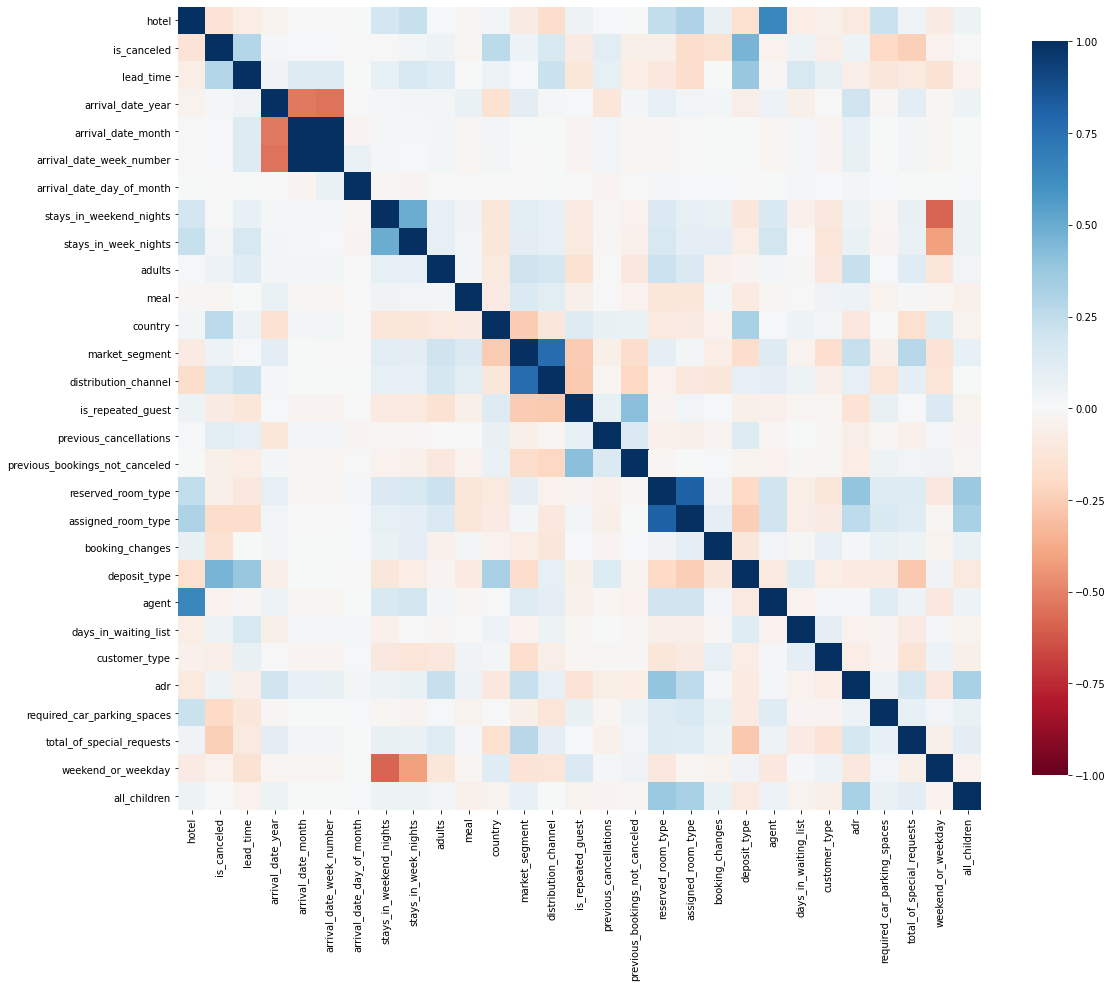

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), square=True, cmap='RdBu', cbar_kws={"shrink": .75}, vmin=-1, vmax=1)

In [21]:
y = df['is_canceled']
X = df.drop('is_canceled', axis=1)

# Classification Model

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params_dt = {'criterion': ['gini', 'entropy'],
             'min_samples_split': [2,4,6,8],
             'min_samples_leaf': [1,2,3,4,5], 
             'max_features': ['auto', 'sqrt']}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, cv=5, scoring='f1', n_jobs=-1)
grid_dt.fit(X,y)
grid_dt.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [24]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

dt = DecisionTreeClassifier(criterion='entropy', 
                            max_features='auto', 
                            min_samples_leaf=5, 
                            min_samples_split=2)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, 
                            min_samples_leaf=5, 
                            min_samples_split=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

et = ExtraTreesClassifier(n_estimators=100, 
                          min_samples_leaf=5, 
                          min_samples_split=2)
et.fit(X_train, y_train)
et_pred = et.predict(X_test)

# Classification Result

Text(0.5, 1.0, 'Extra Tree')

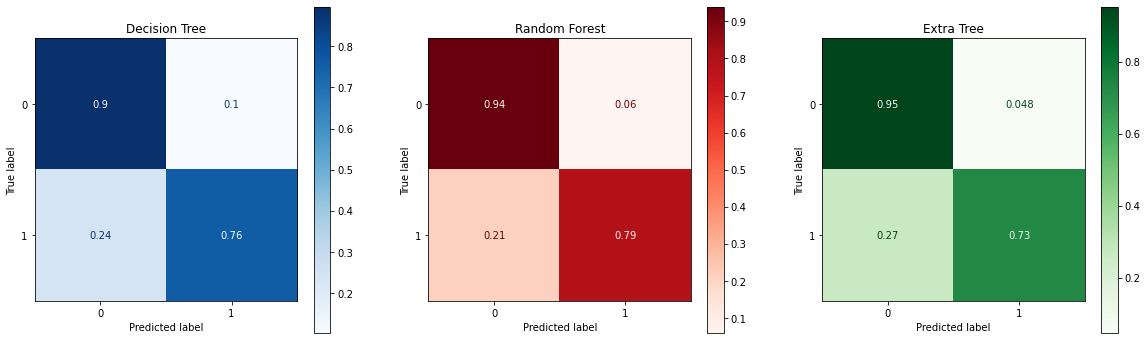

In [44]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,6))

plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', normalize='true', ax=ax[0])
ax[0].set_title('Decision Tree')

plot_confusion_matrix(rf, X_test, y_test, cmap='Reds', normalize='true', ax=ax[1])
ax[1].set_title('Random Forest')

plot_confusion_matrix(et, X_test, y_test, cmap='Greens', normalize='true', ax=ax[2])
ax[2].set_title('Extra Tree')

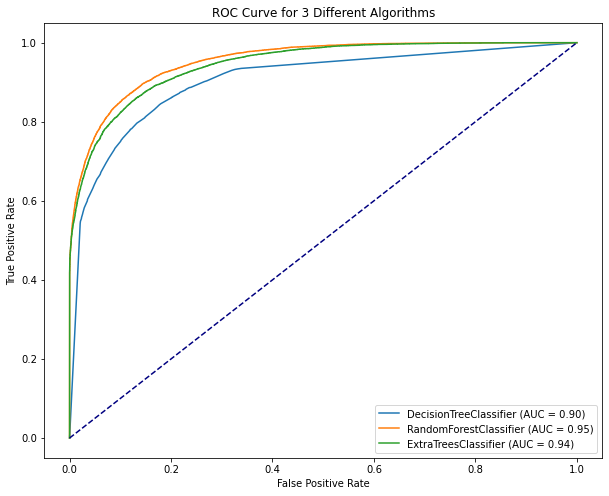

In [30]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,8))
ax = plt.gca()
dt_disp = plot_roc_curve(dt, X_test, y_test, ax=ax)
rf_disp = plot_roc_curve(rf, X_test, y_test, ax=ax)
et_disp = plot_roc_curve(et, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve for 3 Different Algorithms')
plt.show()

<BarContainer object of 28 artists>

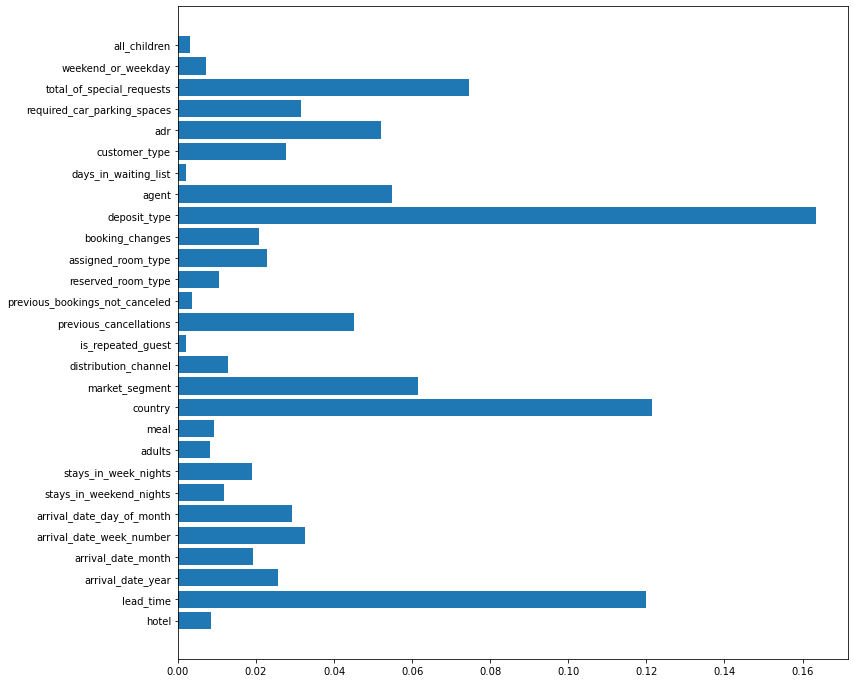

In [48]:
plt.figure(figsize=(12,12))
plt.barh(X.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')